In [164]:
import pyaudio
import struct
import numpy
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy.spatial import Voronoi, voronoi_plot_2d
import wave

In [165]:
import random

def random_color(as_str=True, alpha=0.5):
    rgb = [random.randint(0,255),
           random.randint(0,255),
           random.randint(0,255)]
    if as_str:
        return "rgba"+str(tuple(rgb+[alpha]))
    else:
        return list(numpy.array(rgb)/255) + [alpha]

In [166]:
stream = wave.open('Arfus_-_03_-_Noxillate.wav', mode='rb')
CHUNK = stream.getframerate()
maxVals = list()
meanVals = list()
while stream.tell() != stream.getnframes():
    rawData = stream.readframes(CHUNK)
    data = numpy.frombuffer(rawData, numpy.int16)
    transformed = fftpack.fft(data)

    trimmedData = abs(transformed[0:CHUNK])
    freqRange = fftpack.fftfreq(CHUNK, 1/stream.getframerate())
    freqs = (trimmedData / max(trimmedData) * 256)

    mappedData = dict(zip(freqRange, freqs))

    maxVals.append(abs(max(mappedData, key=mappedData.get)))
    meanVals.append(abs(sum(mappedData.values())) // len(mappedData))

In [167]:
xStep = 20
xIdx = xStep
voronoiPoints = list()
for freq in maxVals:
    voronoiPoints.append((xIdx, round(freq)))
    xIdx += xStep

# voronoiPoints

In [168]:
len(voronoiPoints)

265

In [169]:
from voronoi_polygons import voronoi_finite_polygons_2d

vor = Voronoi(voronoiPoints)

regions, vertices = voronoi_finite_polygons_2d(vor, radius=10)

polygons = []
for reg in regions:
    polygon = vertices[reg]
    polygons.append(polygon)

# fig = voronoi_plot_2d(vor)

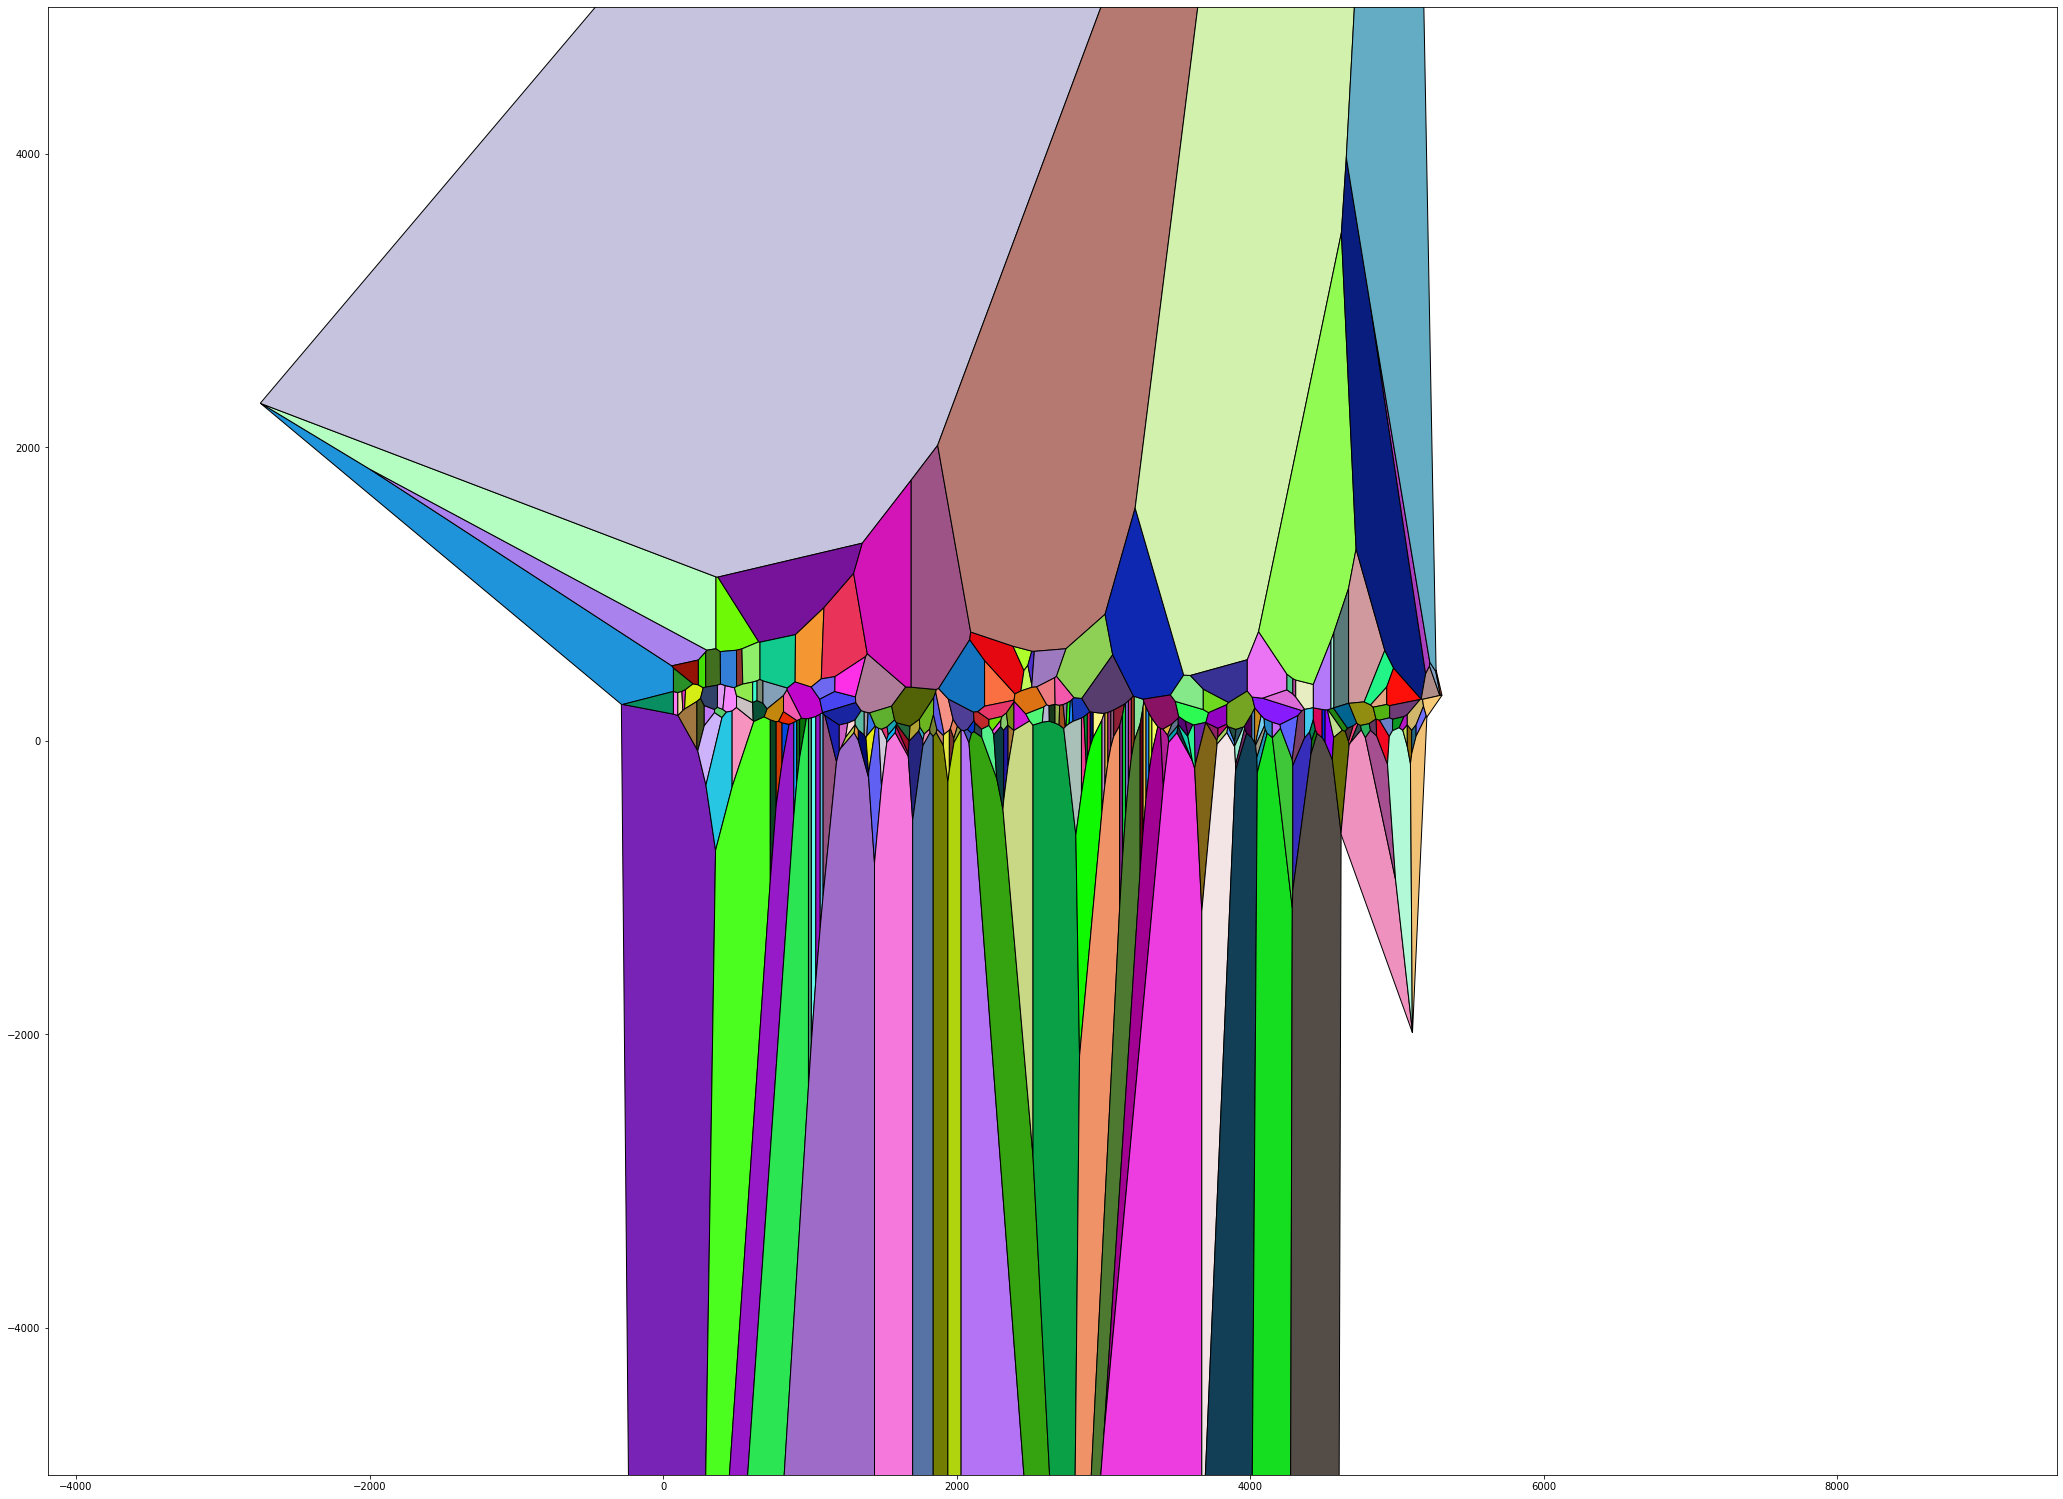

In [170]:

from matplotlib.patches import Polygon

plt.figure(figsize=(36, 27))
ax = plt.subplot()
plt.axis("equal")

for poly in polygons:
        colored_cell = Polygon(poly,
                               facecolor=random_color(as_str=False, alpha=1),
                               edgecolor="black")
        ax.add_patch(colored_cell)

ax.set_xlim(0, xStep*len(voronoiPoints))
ax.set_ylim(-5000, 5000)
plt.show()